In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.path.append('../src/')
import stochastic_benchmark

import dill
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import glob
import seaborn.objects as so

import bootstrap
import df_utils
import interpolate
import random_exploration
import sequential_exploration
import names
import stats
import success_metrics
import training

from setups import *

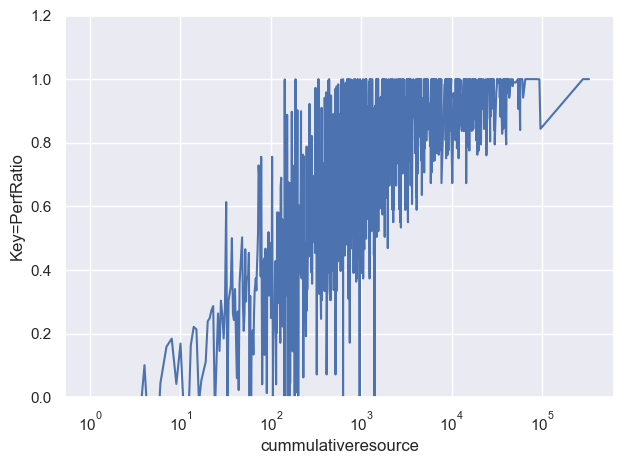

In [39]:
cumm_df = df_utils.eval_cumm(v, sb.instance_cols, 'resource', 'Key=PerfRatio', 1 )

small = cumm_df[(cumm_df['N'] == 1) & (cumm_df['n'] == 50) & (cumm_df['idx'] == 2)]

p = (
    so.Plot(data=cumm_df, x='cummulativeresource', y=keyname)
    .add(so.Line(), so.Agg('median'))
    .scale(x='log').limit(y=(0., 1.2))
    )
p.show()

In [109]:
k = 'stats'
v = sb.projections[k]
key = 'PerfRatio'
keyname = names.param2filename({'Key': key}, '')
cumm_df = v.copy()
cumm_df['TotalResource'] = cumm_df['resource']
display(v)

,N,n,idx,train,sweeps,resource,Key=Response,ConfInt=lower_Key=Response,ConfInt=upper_Key=Response,Key=PerfRatio,...,ConfInt=lower_Key=MeanTime,ConfInt=upper_Key=MeanTime,Key=RTT,ConfInt=lower_Key=RTT,ConfInt=upper_Key=RTT,boots,order,distance_scaled,sweeps_scaled,sweeps_rec
0,1,50,2,0,1,1.0,686.763375,430.091854,943.434896,-85.845422,...,0.000023,0.000023,NaN,NaN,NaN,1.0,16.0,0.000000e+00,0.000000,1.0
1,1,110,3,0,1,1.0,4194.712938,3159.423046,5230.002829,-392.487760,...,0.000101,0.000101,NaN,NaN,NaN,1.0,21.0,0.000000e+00,0.000000,1.0
2,2,10,1,0,1,1.0,7.315500,0.296099,14.334901,-0.975400,...,0.000002,0.000002,NaN,NaN,NaN,1.0,20.0,0.000000e+00,0.000000,1.0
3,2,30,2,0,1,1.0,122.117500,67.437975,176.797025,-14.802121,...,0.000009,0.000009,NaN,NaN,NaN,1.0,9.0,0.000000e+00,0.000000,1.0
4,2,90,3,0,1,1.0,1845.393375,1339.976751,2350.809999,-84.120496,...,0.000081,0.000081,NaN,NaN,NaN,1.0,24.0,0.000000e+00,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,4,10,2,0,117,56043.0,-8.000000,-8.000000,-8.000000,1.000000,...,0.000029,0.000029,0.000467,0.000425,0.000511,479.0,NaN,0.000000e+00,0.001502,117.0
2874,7,130,3,0,117,56043.0,-13.162500,-18.550412,-7.774588,0.679355,...,0.000839,0.000839,NaN,NaN,NaN,479.0,NaN,0.000000e+00,0.001502,117.0
2875,22,30,2,0,117,56043.0,-8.250000,-8.250000,-8.250000,1.000000,...,0.000102,0.000102,0.014416,0.010997,0.018487,479.0,NaN,0.000000e+00,0.001502,117.0
2876,8,70,3,0,562,269198.0,-39.625000,-39.625000,-39.625000,1.000000,...,0.001428,0.001428,0.152578,0.117842,0.181997,479.0,NaN,0.000000e+00,0.007769,562.0


100%|██████████████████████████████████████████| 2728/2728 [00:21<00:00, 125.80it/s]


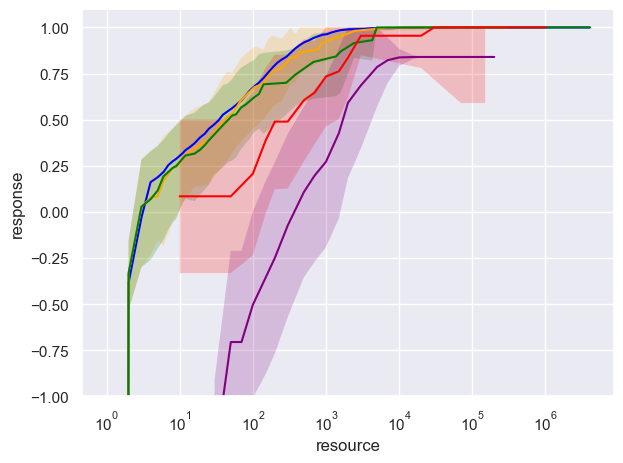

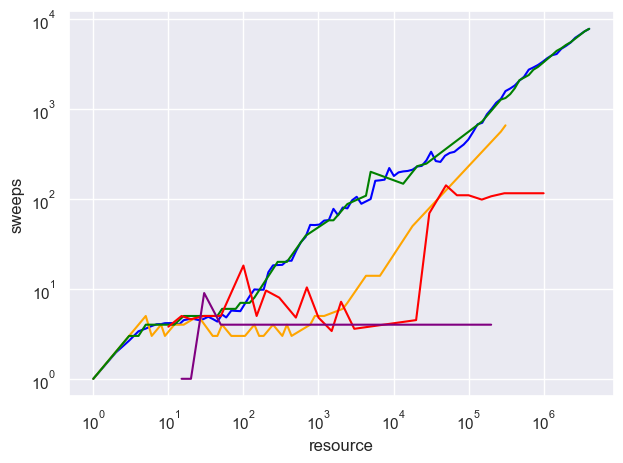

In [22]:
sb = max_clique_setup(0.5)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(-1., 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

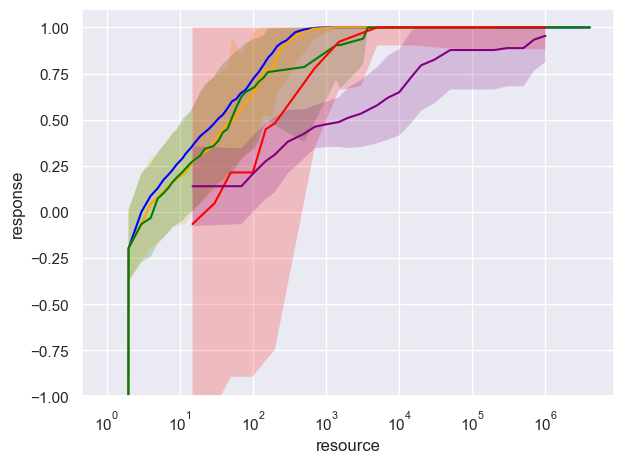

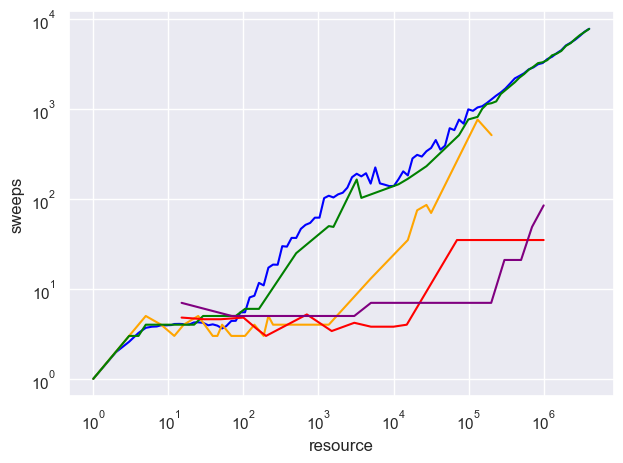

In [21]:
sb = max_clique_setup(0.25)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(-1., 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

100%|██████████████████████████████████████████| 2728/2728 [00:13<00:00, 204.91it/s]


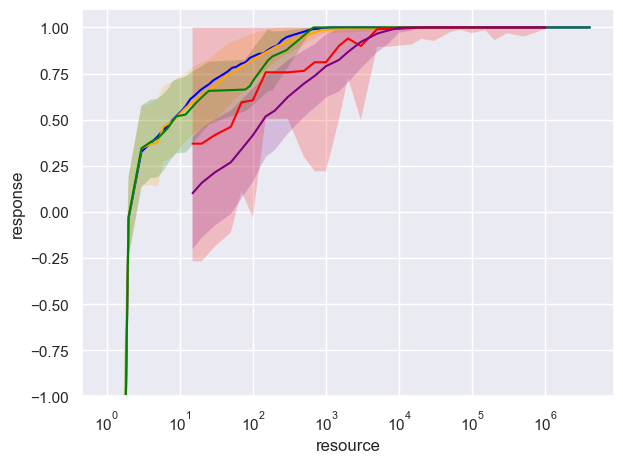

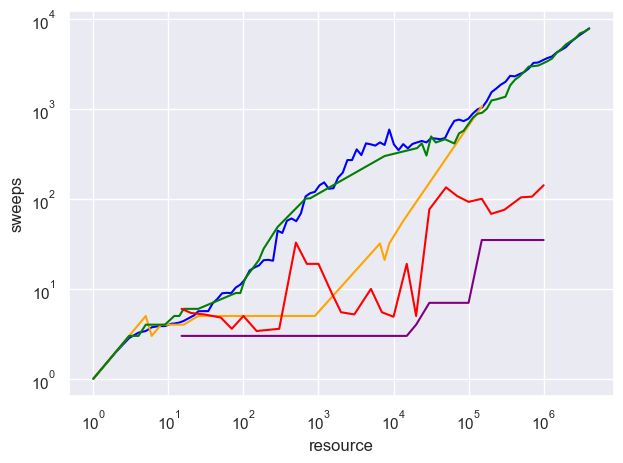

In [23]:
sb = max_clique_setup(0.75)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(-1., 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

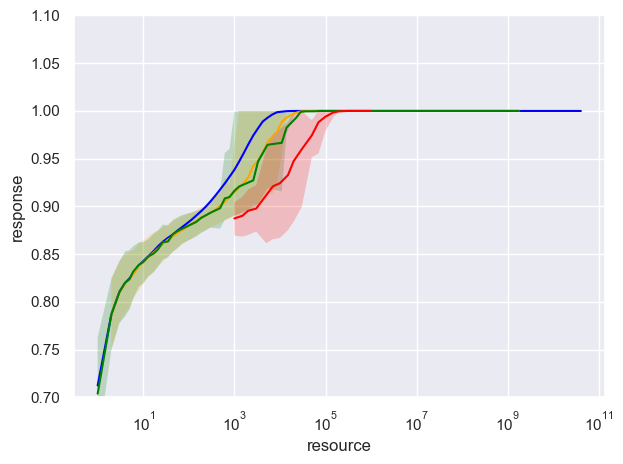

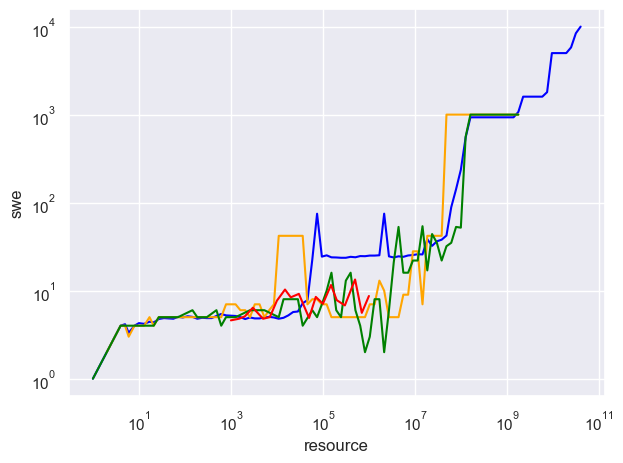

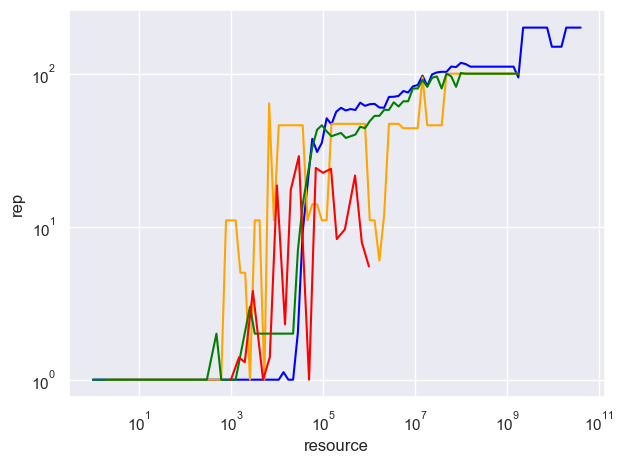

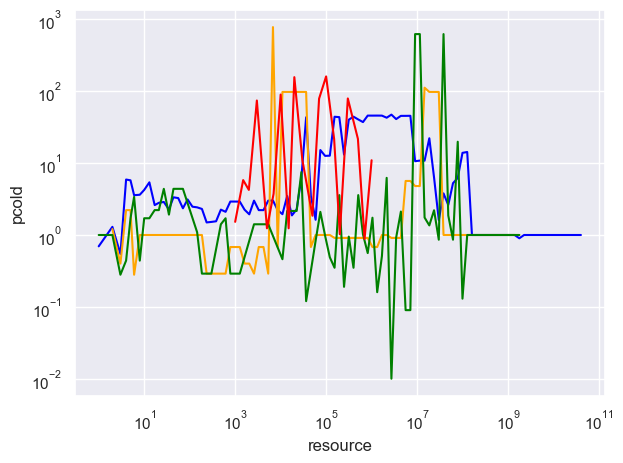

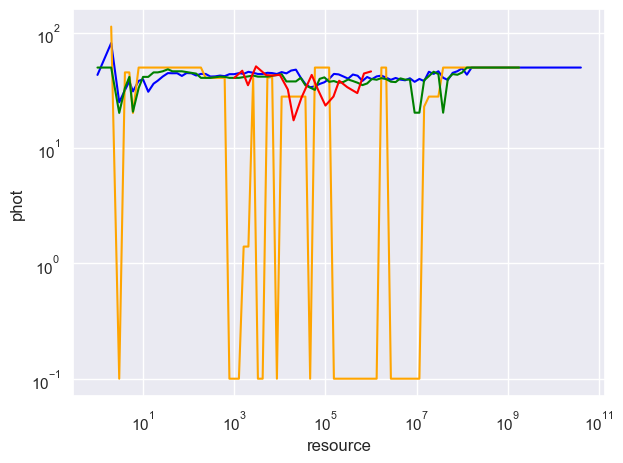

In [29]:
sb = wishart_setup(50, '0.80')
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.7, 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

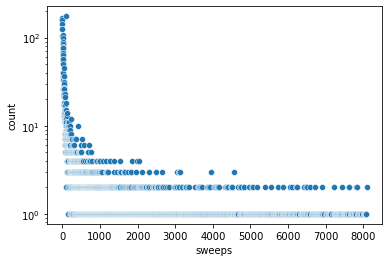

In [42]:
small_results = df[df['boots'] == 1]
count_sweeps = small_results.groupby('sweeps').size()
count_sweeps.name = 'count'
count_sweeps = count_sweeps.to_frame()
sns.scatterplot(x='sweeps', y='count', data = count_sweeps)
ax = plt.gca()
ax.set_yscale('log')

100%|██████████████████████████████████████████| 7600/7600 [01:03<00:00, 119.02it/s]


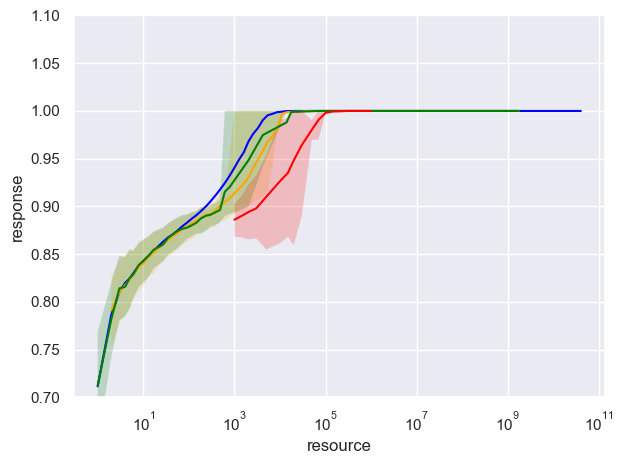

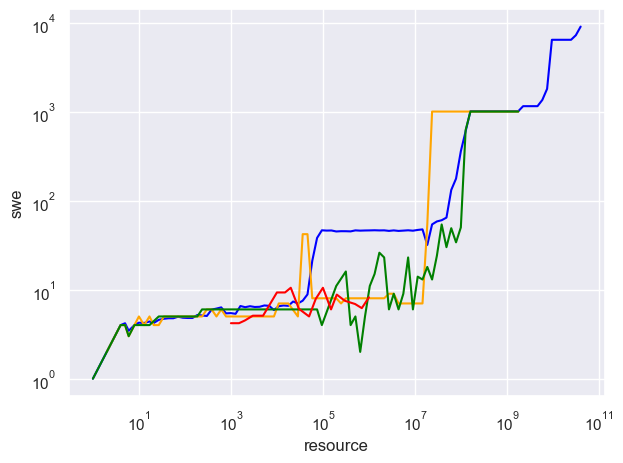

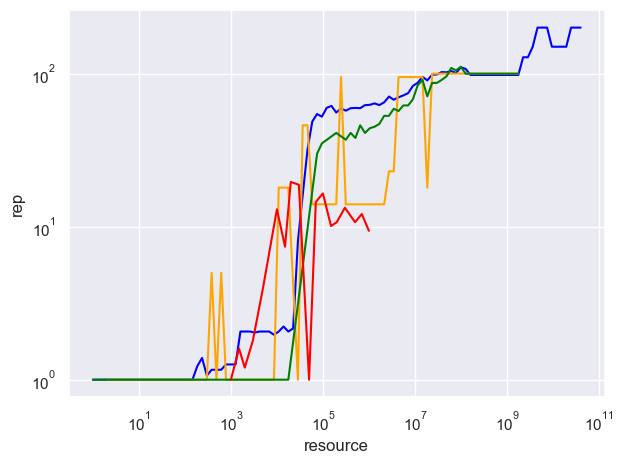

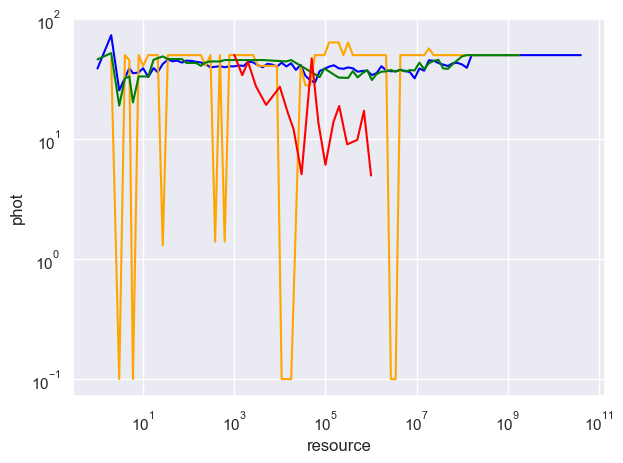

In [30]:
sb = wishart_setup(50, '0.80', 'nopcold')
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.7, 1.1))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

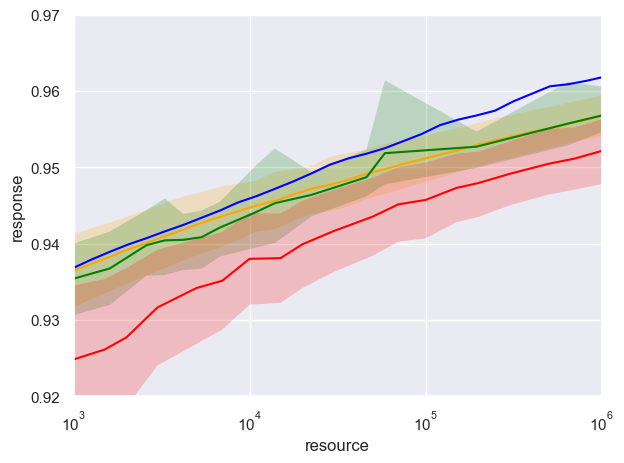

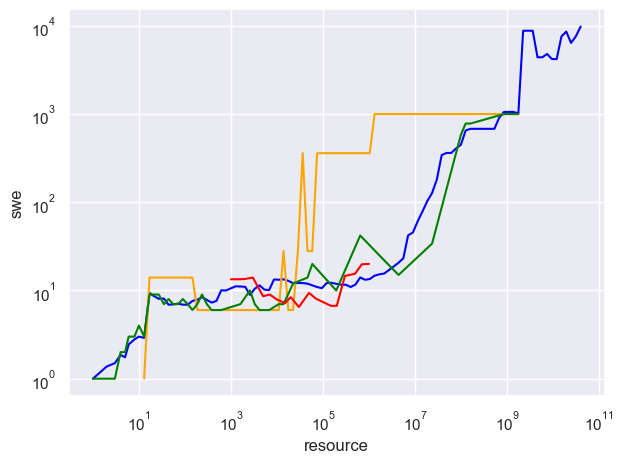

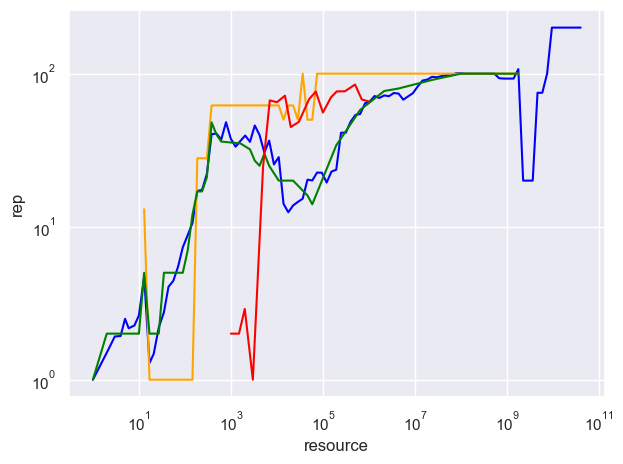

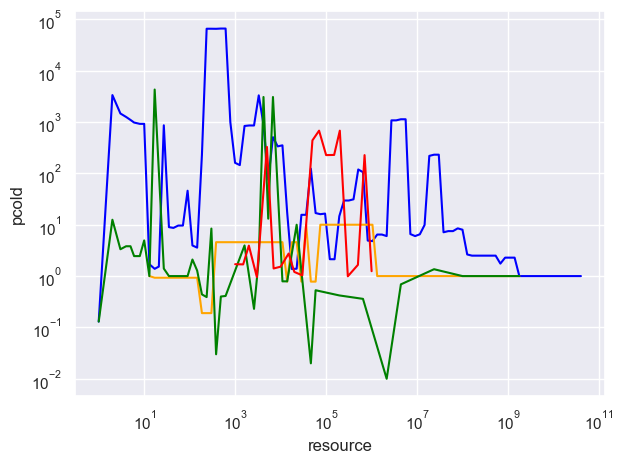

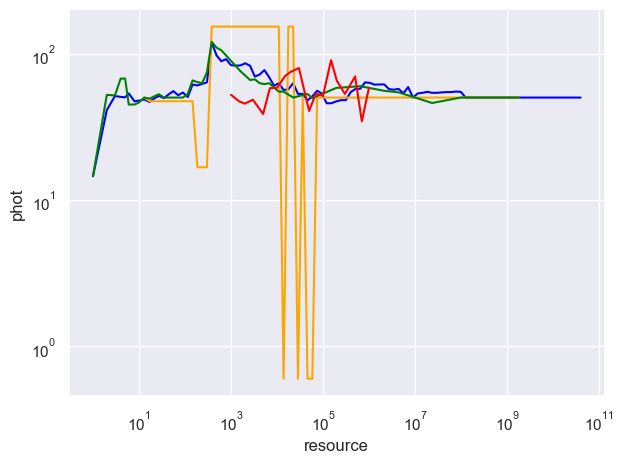

In [34]:
sb = wishart_setup(100, '0.50')
p = sb.plot_performance()
p = p.scale(x='log').limit(x=(10**3, 10**6), y=(0.92, 0.97))
p.show()

p_dict = sb.plot_parameters()

for p in p_dict.values():
    p = p.scale(x='log', y='log')
    p.show()

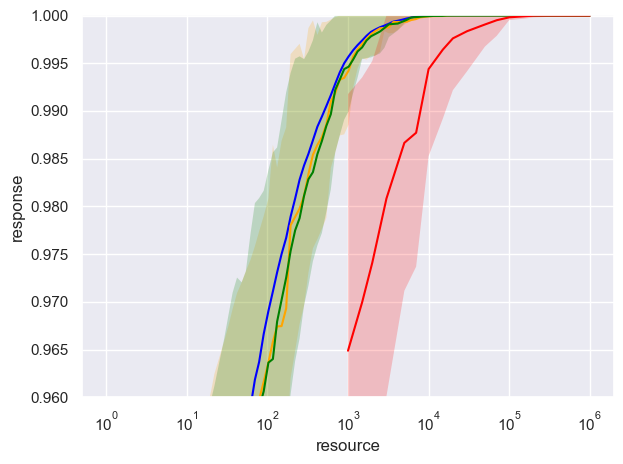

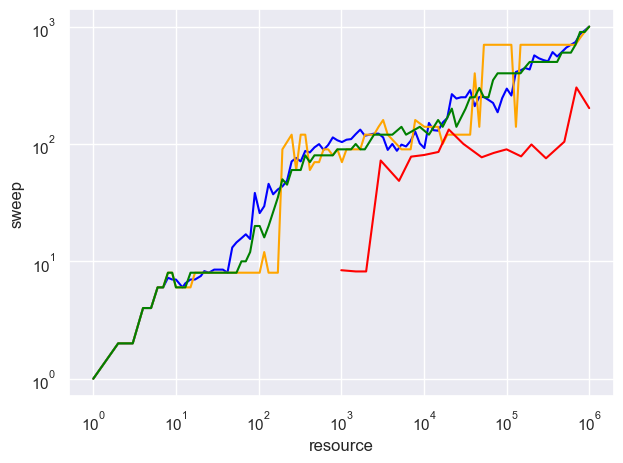

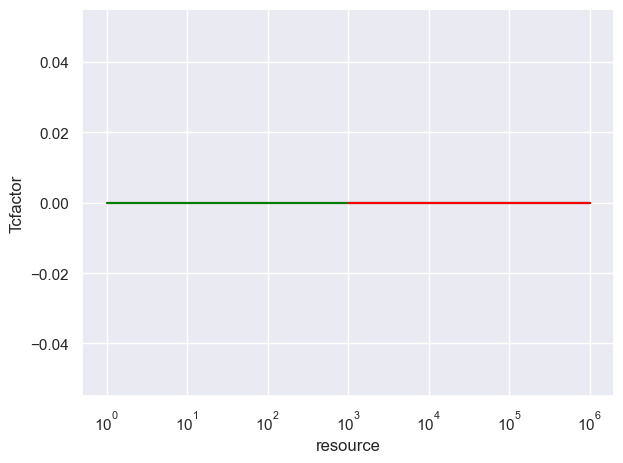

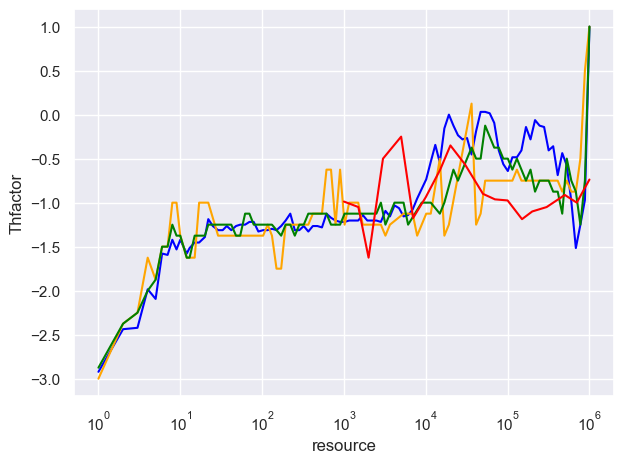

In [38]:
sb = skpleiades_setup(100)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.96, 1.))
p.show()

p_dict = sb.plot_parameters()

for k, p in p_dict.items():
    if k == 'sweep':
        p = p.scale(x='log', y='log')
    else:
        p = p.scale(x='log')
    p.show()

100%|███████████████████████████████████████████| 7600/7600 [02:38<00:00, 48.03it/s]


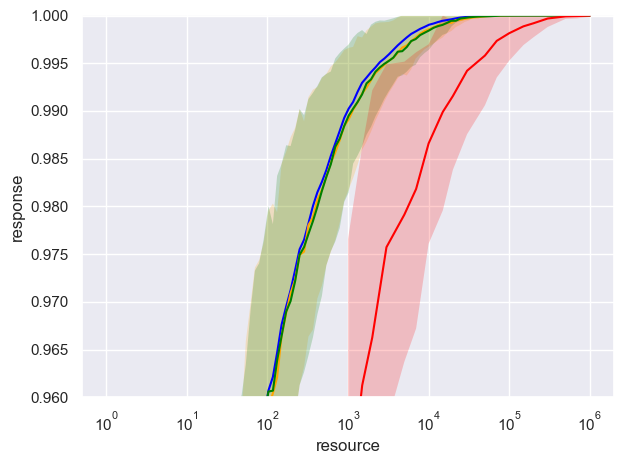

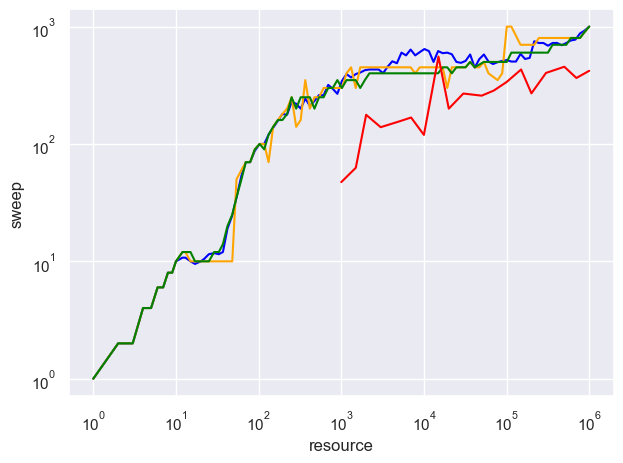

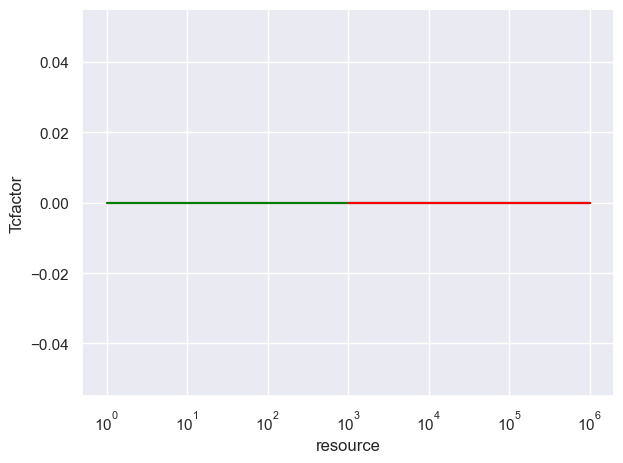

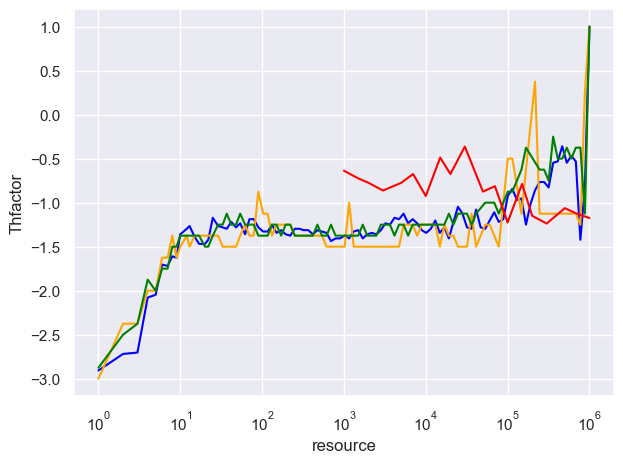

In [39]:
sb = skpleiades_setup(200)
p = sb.plot_performance()
p = p.scale(x='log').limit(y=(0.96, 1.))
p.show()

p_dict = sb.plot_parameters()

for k, p in p_dict.items():
    if k == 'sweep':
        p = p.scale(x='log', y='log')
    else:
        p = p.scale(x='log')
    p.show()

Sequential search experiment terminated due to not enough data
Sequential search experiment terminated due to not enough data
Sequential search experiment terminated due to not enough data
Sequential search experiment terminated due to not enough data
Sequential search experiment terminated due to not enough data
Sequential search experiment terminated due to not enough data
Not enough test data for sequential search. Evaluating on train.


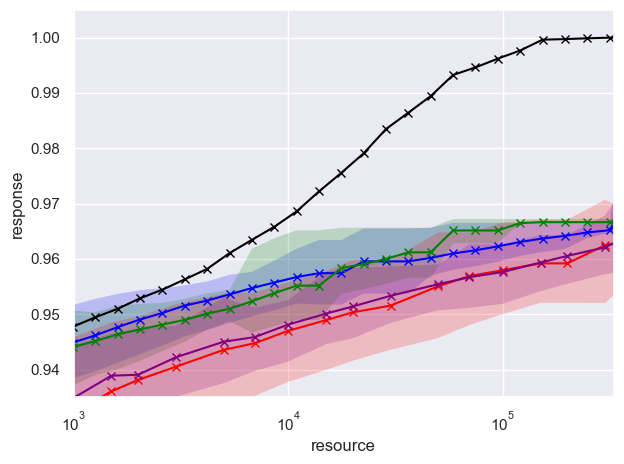

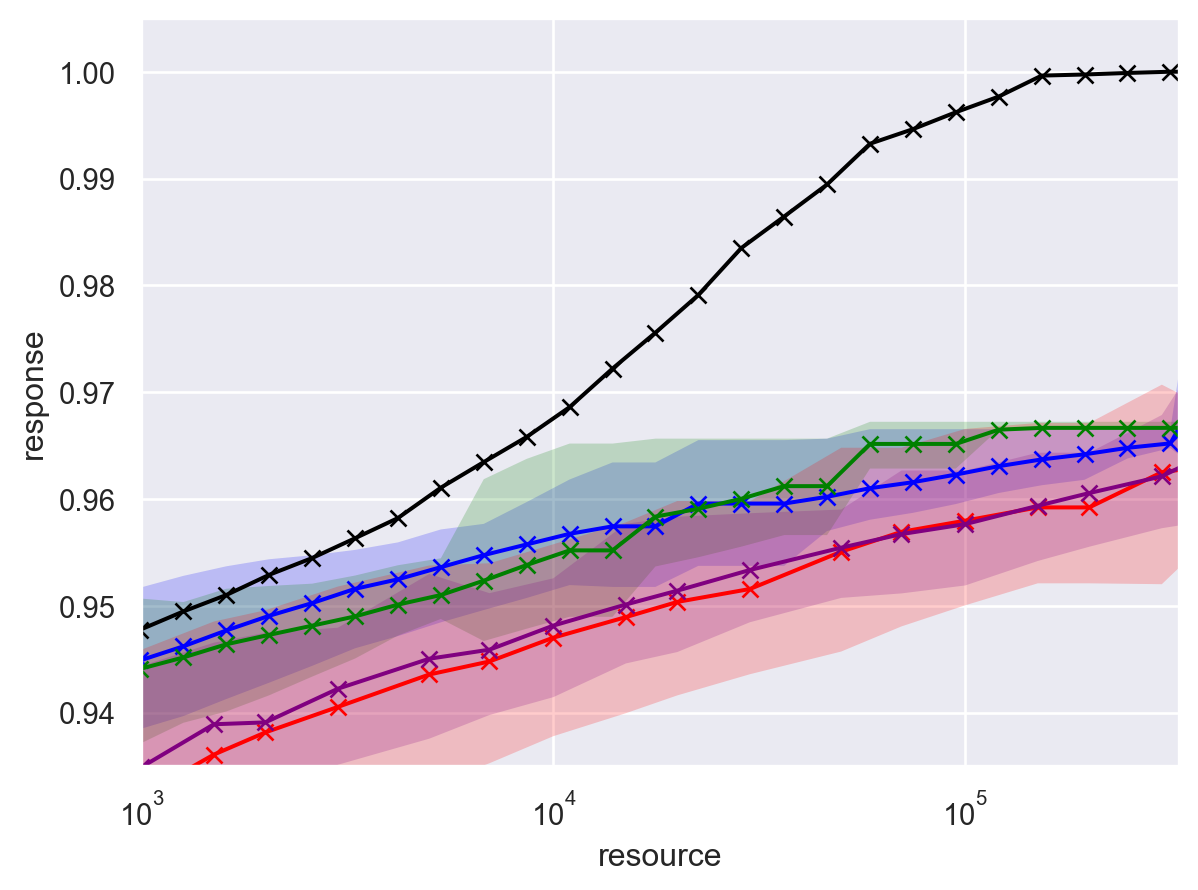

In [77]:
sb = wishart_setup(50, '0.50')
p = sb.plot_performance()
p = p.scale(x='log').limit(x=(10**3, 3.3 * 10**5), y=(0.935, 1.005))
p.show()
p.save(os.path.join(sb.here.plots, 'performance_plot.png'))
# p_dict = sb.plot_parameters()

# for p in p_dict.values():
#     p = p.scale(x='log').limit(x=(10**3, 10**6))
#     p.show()